<a href="https://www.kaggle.com/code/chrisdimas/airbnb-prices-in-european-cities?scriptVersionId=122808643" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LReg
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berl

In [2]:
####### read the csv data files for each city/day occasion
###### set each city data as pd{City}_days and pd{City}_wend as global DataFrames

Citiesnames=['amsterdam','athens','barcelona','berlin','budapest','lisbon',\
             'london','paris','rome','vienna']
Cities_inds=[city.capitalize() for city in Citiesnames]
for city in Citiesnames:
    filetosearch1='/kaggle/input/airbnb-prices-in-european-cities/'+city+'_weekdays.csv'
    filetosearch2='/kaggle/input/airbnb-prices-in-european-cities/'+city+'_weekends.csv'
    globals()[f"pd{city.capitalize()}_days"]=pd.read_csv(filetosearch1)
    globals()[f"pd{city.capitalize()}_wend"]=pd.read_csv(filetosearch2)

In [3]:
###### find average rental fees for each particular city, for weekdays and weekends respectively 
def Find_Ave_Rent(city):
    city_Rent_days=globals()[f"pd{city.capitalize()}_days"]['realSum'].values
    city_Rent_ends=globals()[f"pd{city.capitalize()}_wend"]['realSum'].values
    Avg_rent_days=np.round(100*np.average(city_Rent_days))/100
    Avg_rent_ends=np.round(100*np.average(city_Rent_ends))/100
    return(Avg_rent_days,Avg_rent_ends)

###### sort cities by weekdays rental fees 
CityAveRent_days=np.array([])
CityAveRent_ends=np.array([])
for city in Citiesnames:
    avedays,aveends=Find_Ave_Rent(city)
    CityAveRent_days=np.append(CityAveRent_days,avedays)
    CityAveRent_ends=np.append(CityAveRent_ends,aveends)
    #print('Average Weedkdays Cost/Day in ',city.capitalize(),': ',avedays)
    #print('Average Weedends Cost/Day in ',city.capitalize(),': ',aveends)
#print(CityAveRent_days)
AveRents=np.transpose(np.vstack([CityAveRent_days,CityAveRent_ends]))
#print(AveRents)
#print(np.shape(AveRents))
df=pd.DataFrame(AveRents,index=Cities_inds,columns=['Weekdays','Weekend'])
print('Most Expensive European Cities by Weekdays Rental Fees:')
df.sort_values(by=['Weekdays'],axis=0,ascending=False,)

Most Expensive European Cities by Weekdays Rental Fees:


Weekdays  Weekend
Amsterdam    545.02   604.83
Paris        398.79   387.03
London       360.23   364.39
Barcelona    288.39   300.28
Vienna       240.38   242.74
Berlin       240.22   249.25
Lisbon       236.35   240.04
Rome         201.62   209.13
Budapest     168.43   185.12
Athens       155.87   147.58

In [4]:
#####  find 
#####  1) percentage of room types per city and 
#####  2) average cost per room type in each city (weekdays/weekends)
#####
Room_Types=pdLondon_days.room_type.unique()
Room_Types.sort()
###
def Find_Type_Counts(city):
    typecount_weekday=globals()[f"pd{city.capitalize()}_days"]['room_type'].value_counts()
    typecount_weekend=globals()[f"pd{city.capitalize()}_wend"]['room_type'].value_counts()
    Nptupe_weekday=np.array(typecount_weekday.sort_index())
    Nptupe_weekend=np.array(typecount_weekend.sort_index())
    percentages_wday=np.round(100*Nptupe_weekday/np.sum(Nptupe_weekday),2)
    percentages_wend=np.round(100*Nptupe_weekend/np.sum(Nptupe_weekend),2)
    return(Nptupe_weekday,Nptupe_weekend,percentages_wday,percentages_wend)

def Find_Type_AveRents(city,room_type):
    ####Weekdays
    dfc1=globals()[f"pd{city.capitalize()}_days"]
    ind1=dfc1.index[dfc1['room_type'] == room_type].tolist()
    ave1=np.average(dfc1.iloc[ind1]['realSum'].values)
    ####Weekends
    dfc2=globals()[f"pd{city.capitalize()}_wend"]
    ind2=dfc2.index[dfc2['room_type'] == room_type].tolist()
    ave2=np.average(dfc2.iloc[ind2]['realSum'].values)
    return(ave1, ave2)

####### define data arrays 
typecount_weekday,typecount_weekend,percentages_wday,percentages_wend=Find_Type_Counts(Citiesnames[0])
AveTypeRentDays=np.array([])
AveTypeRentWend=np.array([])
for room_type in Room_Types:
    Av1,Av2=Find_Type_AveRents(Citiesnames[0],room_type)
    AveTypeRentDays=np.append(AveTypeRentDays,Av1)
    AveTypeRentWend=np.append(AveTypeRentWend,Av2)
AveTypeRentDays=np.expand_dims(AveTypeRentDays,axis=0)
#### fill them 
for city in Citiesnames[1:]:
    tw,te,pw,pe=Find_Type_Counts(city)
    typecount_weekday=np.vstack([typecount_weekday,tw])
    typecount_weekend=np.vstack([typecount_weekend,te])
    percentages_wday=np.vstack([percentages_wday,pw])
    percentages_wend=np.vstack([percentages_wend,pe])
    row1=np.array([])
    row2=np.array([])
    for room_type in Room_Types:
        Av1,Av2=Find_Type_AveRents(city,room_type)
        row1=np.append(row1,Av1)
        row2=np.append(row2,Av2)
    AveTypeRentDays=np.vstack([AveTypeRentDays,row1])
    AveTypeRentWend=np.vstack([AveTypeRentWend,row2])
######
#print(typecount_weekday)
#print(AveTypeRentDays)


In [5]:
##### make two new dataframes which will show the numbers of each room type per city, 
##### and the corresponding average fee, for weekdays and weekends correspondingly
##### 

Types_numeric_data_day=np.concatenate((np.round(typecount_weekday),np.round(AveTypeRentDays,2)),axis=1)
Types_numeric_data_end=np.concatenate((np.round(typecount_weekend),np.round(AveTypeRentWend,2)),axis=1)
typenumindex=Cities_inds
typenumcols=['# of '+Room_Types[0]+'s:','Av. Fee at '+Room_Types[0]+'s:',\
            '# of '+Room_Types[1]+'s:','Av. Fee at '+Room_Types[1]+'s:',\
            '# of '+Room_Types[2]+'s:','Av. Fee at '+Room_Types[2]+'s:']
###### re-arrange Types_numeric_data columns to fit typenumcols:
def rearrange_cols(arr,permutation):
    if np.shape(arr)[1]!=len(permutation):
        return('Unable to perform rearrangment, check dimensions!')
    else:
        idxc = np.empty_like(permutation)
        idxc[permutation] = np.arange(len(permutation))
        return(arr[:, idxc])


permutation = [0, 2, 4, 1, 3, 5]
Types_numeric_data_day_rear=rearrange_cols(Types_numeric_data_day,permutation)
Pd_Types_day=pd.DataFrame(Types_numeric_data_day_rear,index=typenumindex,columns=typenumcols)
Types_numeric_data_end_rear=rearrange_cols(Types_numeric_data_end,permutation)
Pd_Types_end=pd.DataFrame(Types_numeric_data_end_rear,index=typenumindex,columns=typenumcols)

In [6]:
####### show number of rooms/ avg prices per type/city on weekdays
print('Number of rooms per type and average cost per city, weekdays\n')
Pd_Types_day

Number of rooms per type and average cost per city, weekdays



# of Entire home/apts:  Av. Fee at Entire home/apts:  \
Amsterdam                   538.0                        733.18   
Athens                     2447.0                        159.45   
Barcelona                   362.0                        572.56   
Berlin                      474.0                        351.99   
Budapest                   1851.0                        176.30   
Lisbon                     1928.0                        280.08   
London                     1966.0                        551.54   
Paris                      2325.0                        435.59   
Rome                       2754.0                        237.43   
Vienna                     1349.0                        254.55   

           # of Private rooms:  Av. Fee at Private rooms:  # of Shared rooms:  \
Amsterdam                559.0                     366.76                 6.0   
Athens                   201.0                     114.27                 5.0   
Barcelona               1185.0                     202.75                 8.0   
Berlin                   775.0                     176.22                35.0   
Budapest                 216.0                     102.37                 7.0   
Lisbon                   894.0                     147.26                35.0   
London                  2625.0                     218.52                23.0   
Paris                    758.0                     301.95                47.0   
Rome                    1731.0                     145.09                 7.0   
Vienna                   382.0                     191.65                 7.0   

           Av. Fee at Shared rooms:  
Amsterdam                    280.97  
Athens                        76.54  
Barcelona                    114.80  
Berlin                       143.63  
Budapest                     124.51  
Lisbon                       102.61  
London                       181.43  
Paris                        139.80  
Rome                          89.94  
Vienna                       169.83

In [7]:
####### show number of rooms/ avg prices per type/city on weekends
print('Number of rooms per type and average cost per city, weekdend\n')
Pd_Types_end

Number of rooms per type and average cost per city, weekdend



# of Entire home/apts:  Av. Fee at Entire home/apts:  \
Amsterdam                   588.0                        736.09   
Athens                     2425.0                        150.67   
Barcelona                   180.0                        745.08   
Berlin                      408.0                        376.23   
Budapest                   1738.0                        193.38   
Lisbon                     1950.0                        284.88   
London                     2418.0                        539.13   
Paris                      2742.0                        416.22   
Rome                       2807.0                        244.07   
Vienna                     1398.0                        258.49   

           # of Private rooms:  Av. Fee at Private rooms:  # of Shared rooms:  \
Amsterdam                385.0                     407.72                 4.0   
Athens                   196.0                     111.37                 6.0   
Barcelona               1094.0                     227.67                 4.0   
Berlin                   754.0                     184.94                38.0   
Budapest                 203.0                     116.34                 7.0   
Lisbon                   917.0                     150.50                39.0   
London                  2934.0                     222.09                27.0   
Paris                    769.0                     296.52                47.0   
Rome                    1723.0                     152.50                 5.0   
Vienna                   392.0                     189.23                 9.0   

           Av. Fee at Shared rooms:  
Amsterdam                    280.80  
Athens                        80.34  
Barcelona                    142.61  
Berlin                       162.00  
Budapest                     129.15  
Lisbon                       103.47  
London                       178.45  
Paris                        164.91  
Rome                         106.24  
Vienna                       126.14

Text(0.5, 0.98, 'Weekdays Rooms and Rental Costs per City')

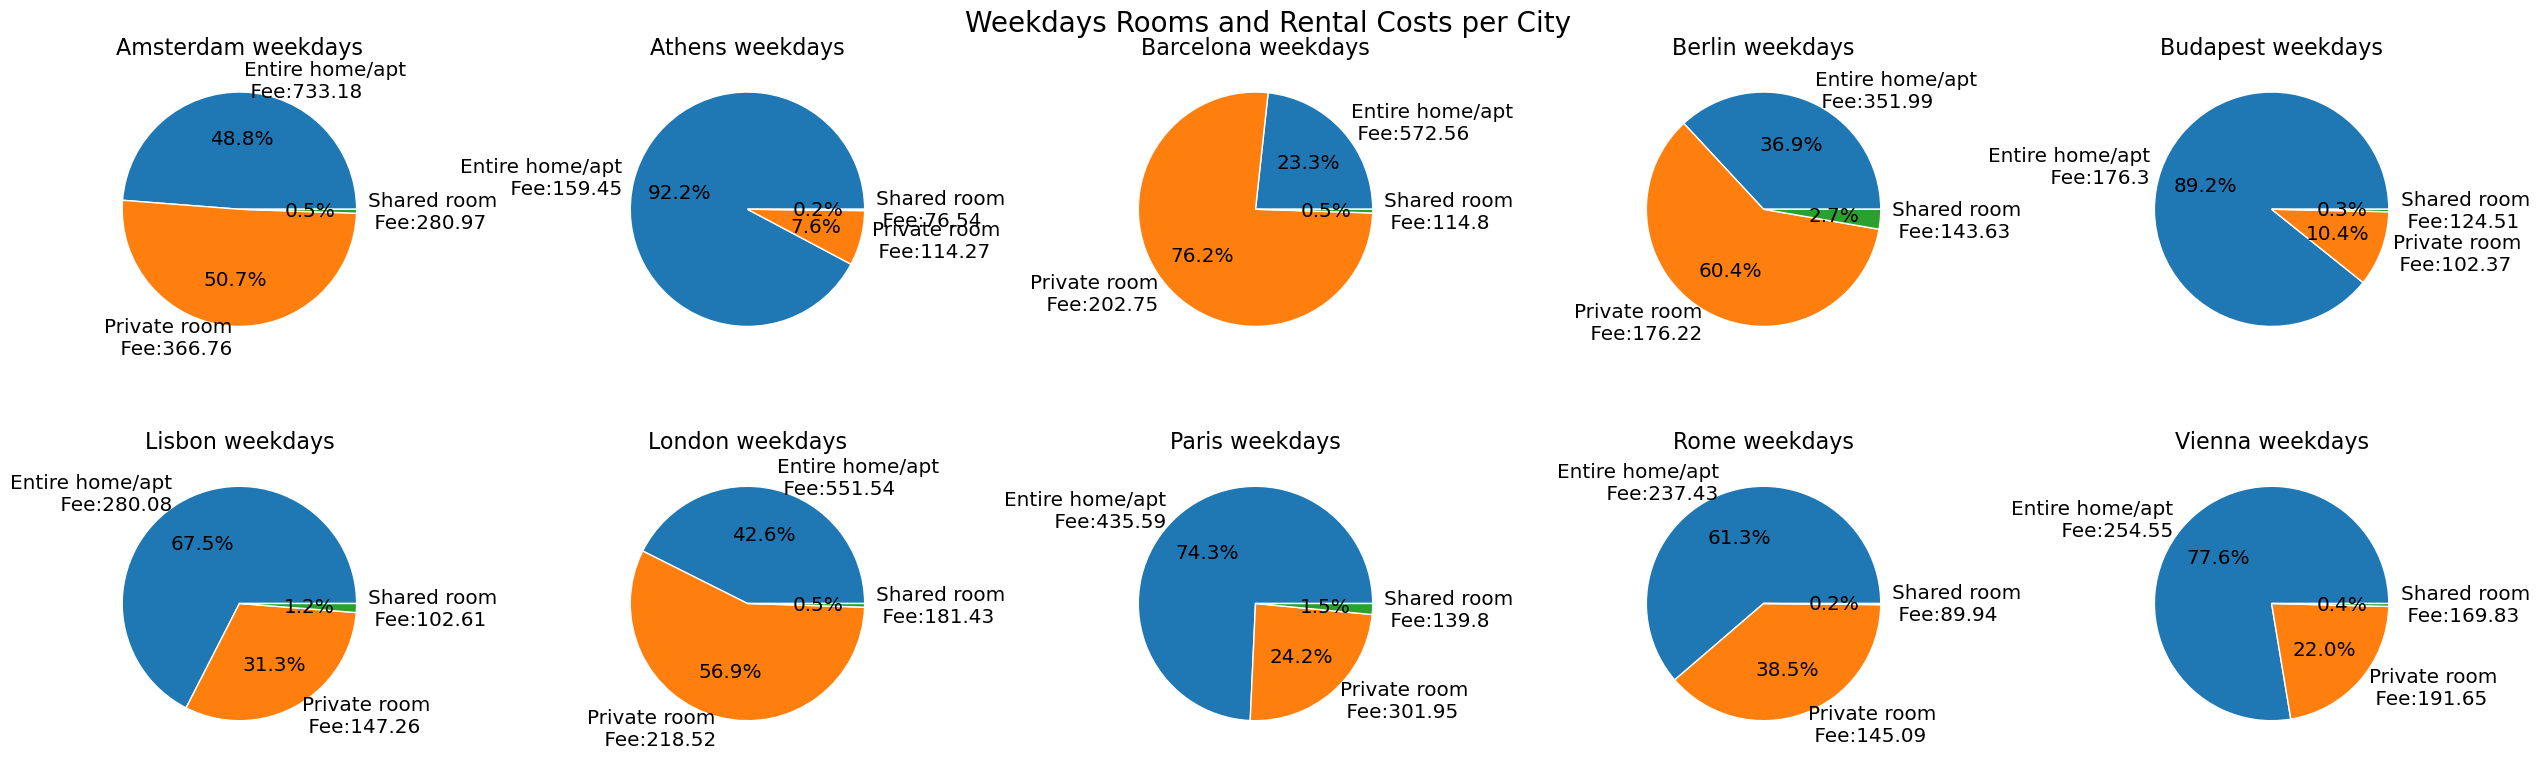

In [8]:
###### pie charts showing rooms number and average costs per type and city on weekdays
fig, axs = \
plt.subplots(nrows=2, ncols=5, sharex=True,figsize=(25, 8))
#####
for i,City in enumerate(Cities_inds):
    globals()[f"ax{i}"]=axs.flat[i]
    x=percentages_wday[i]
    #####
    labels=[Room_Types[0]+'\n Fee:'+str(np.round(AveTypeRentDays[i][0],2)),Room_Types[1]+'\n Fee:'+\
        str(np.round(AveTypeRentDays[i][1],2)),Room_Types[2]+'\n Fee:'+str(np.round(AveTypeRentDays[i][2],2))]
    #####
    globals()[f"ax{i}"].pie(x, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    #####
    globals()[f"ax{i}"].set_title(Cities_inds[i]+' weekdays', fontsize=16)

plt.tight_layout()
fig.suptitle('Weekdays Rooms and Rental Costs per City', fontsize=20)

Text(0.5, 0.98, 'Weekends Rooms and Rental Costs per City')

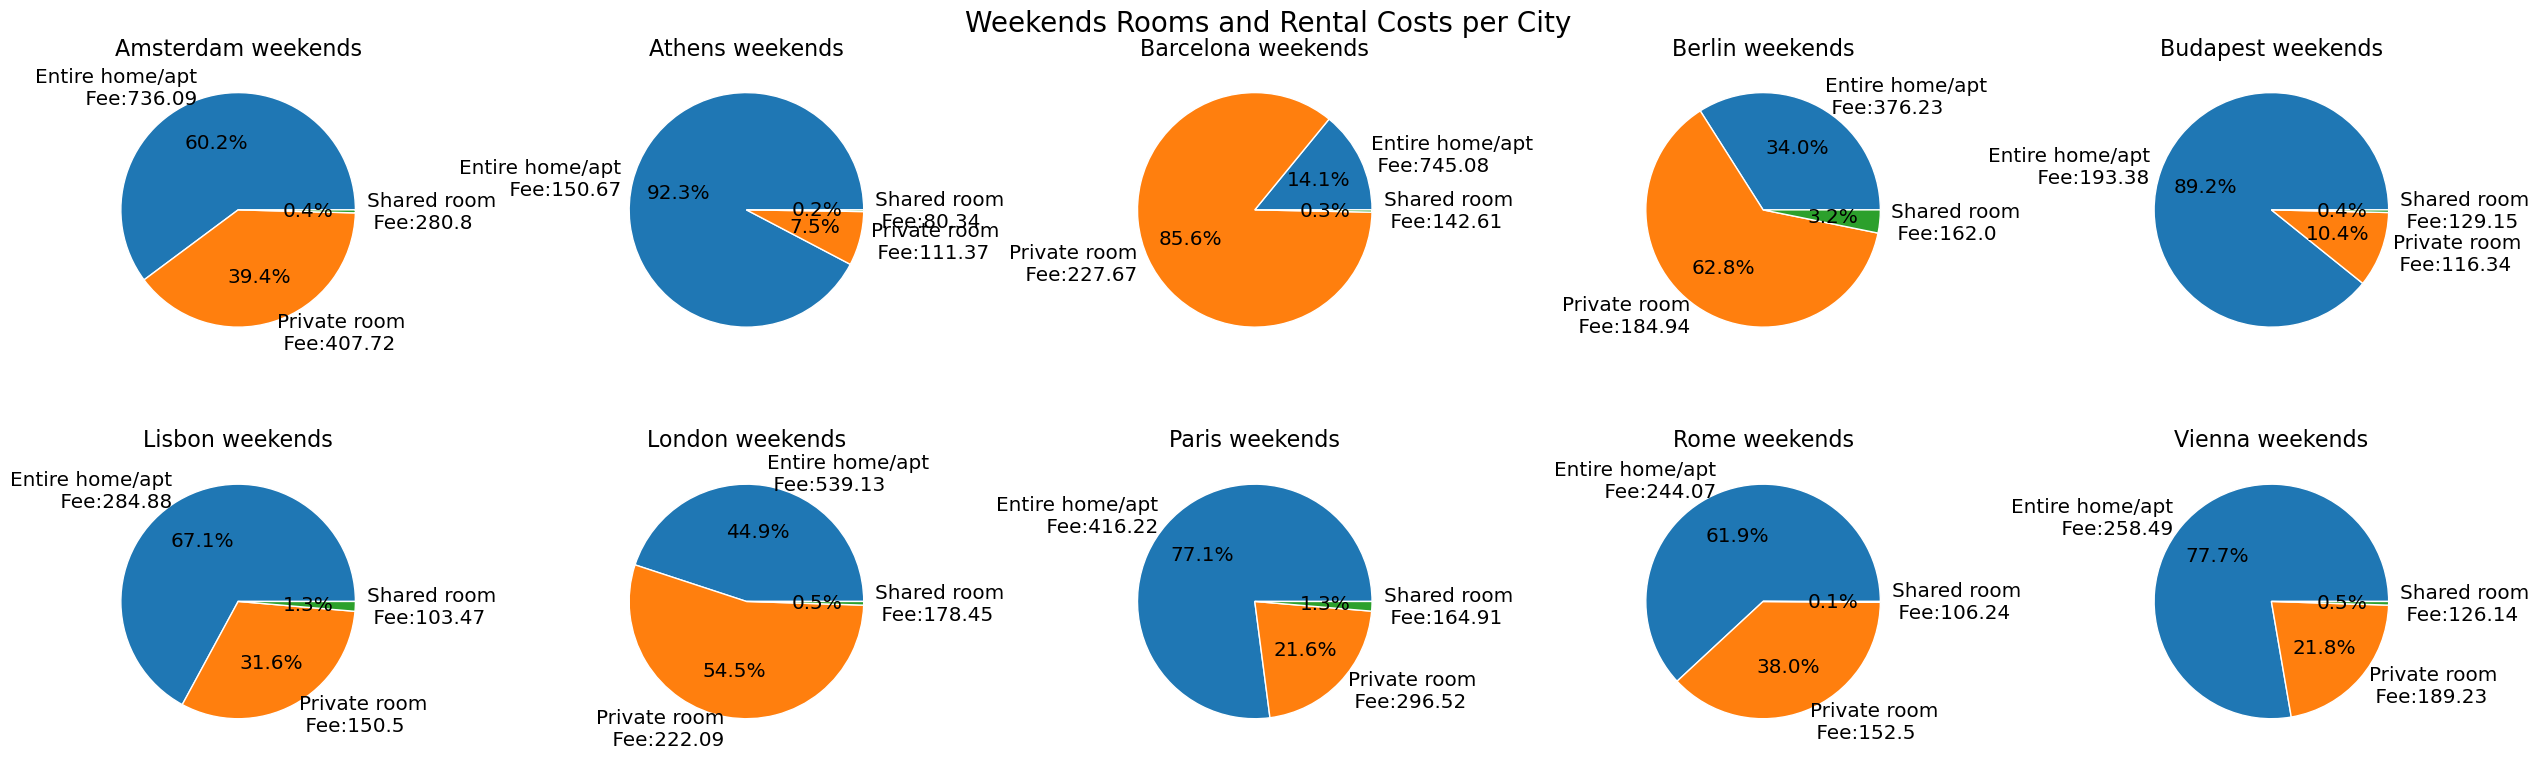

In [9]:
###### pie charts showing rooms number and average costs per type and city on weekends
fig, axs = \
plt.subplots(nrows=2, ncols=5, sharex=True,figsize=(25, 8))
#####
for i,City in enumerate(Cities_inds):
    globals()[f"ax{i}"]=axs.flat[i]
    x=percentages_wend[i]
    #####
    labels=[Room_Types[0]+'\n Fee:'+str(np.round(AveTypeRentWend[i][0],2)),Room_Types[1]+'\n Fee:'+\
        str(np.round(AveTypeRentWend[i][1],2)),Room_Types[2]+'\n Fee:'+str(np.round(AveTypeRentWend[i][2],2))]
    #####
    globals()[f"ax{i}"].pie(x, labels=labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    #####
    globals()[f"ax{i}"].set_title(Cities_inds[i]+' weekends', fontsize=16)

plt.tight_layout()
fig.suptitle('Weekends Rooms and Rental Costs per City', fontsize=20)

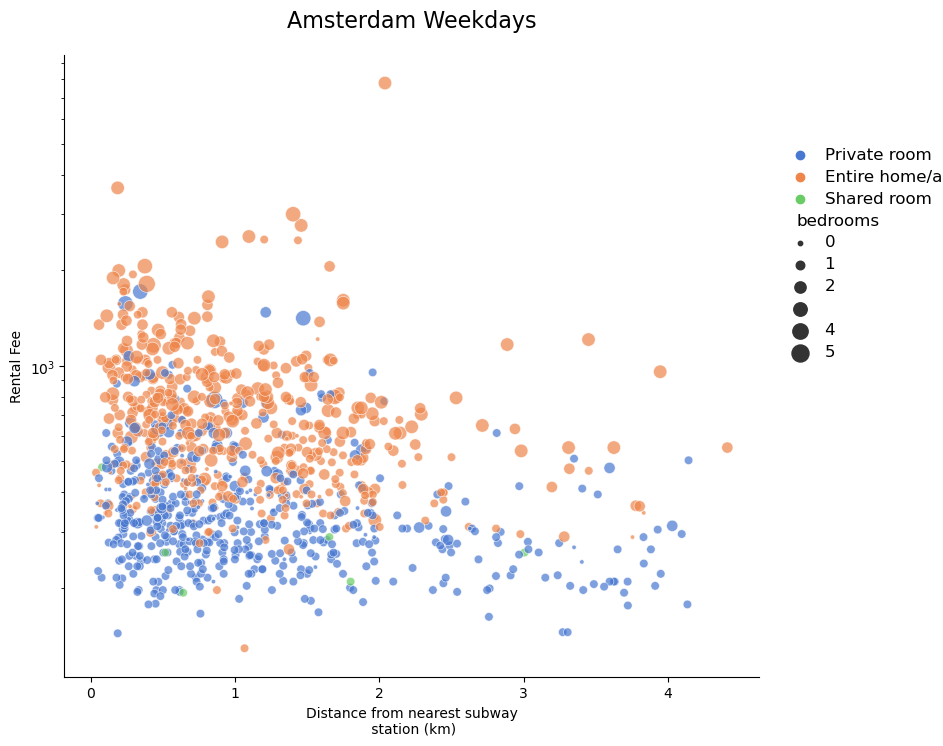

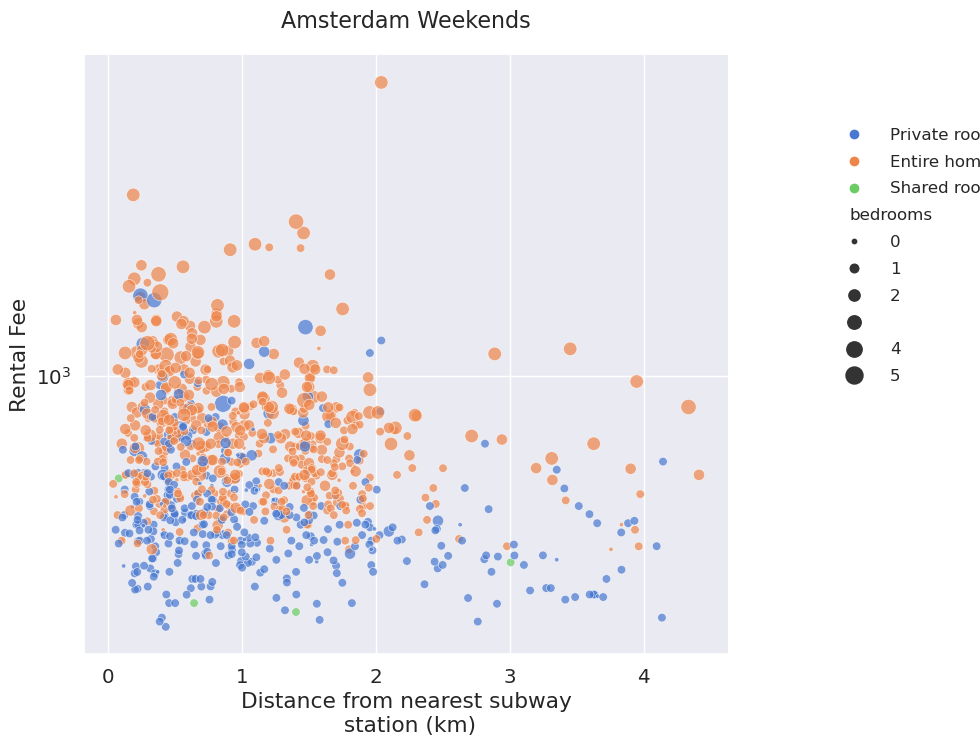

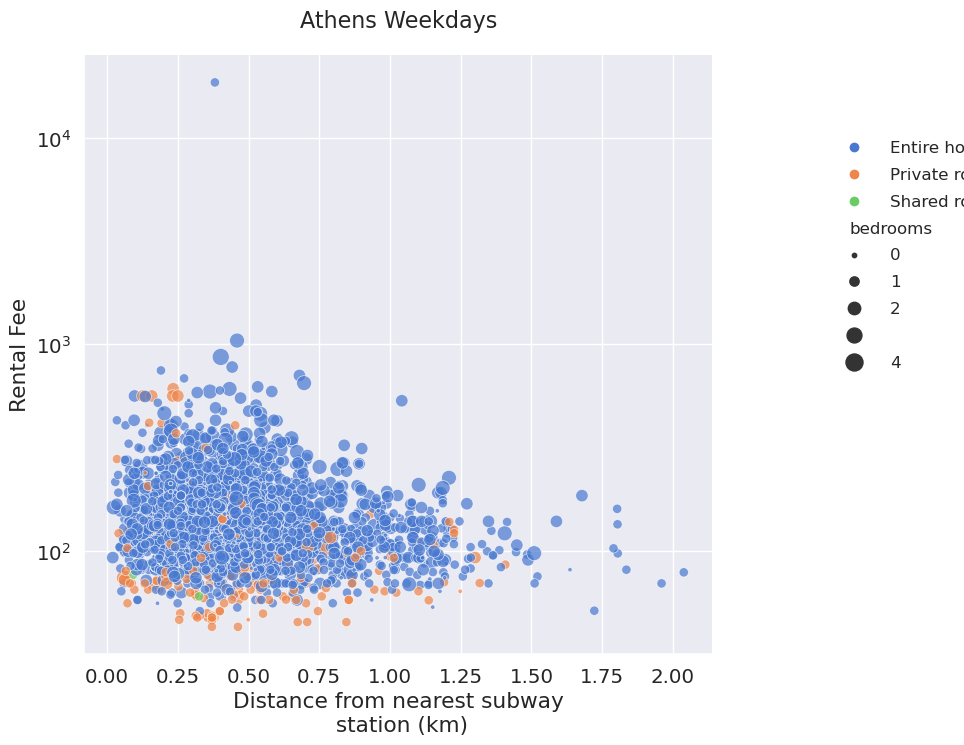

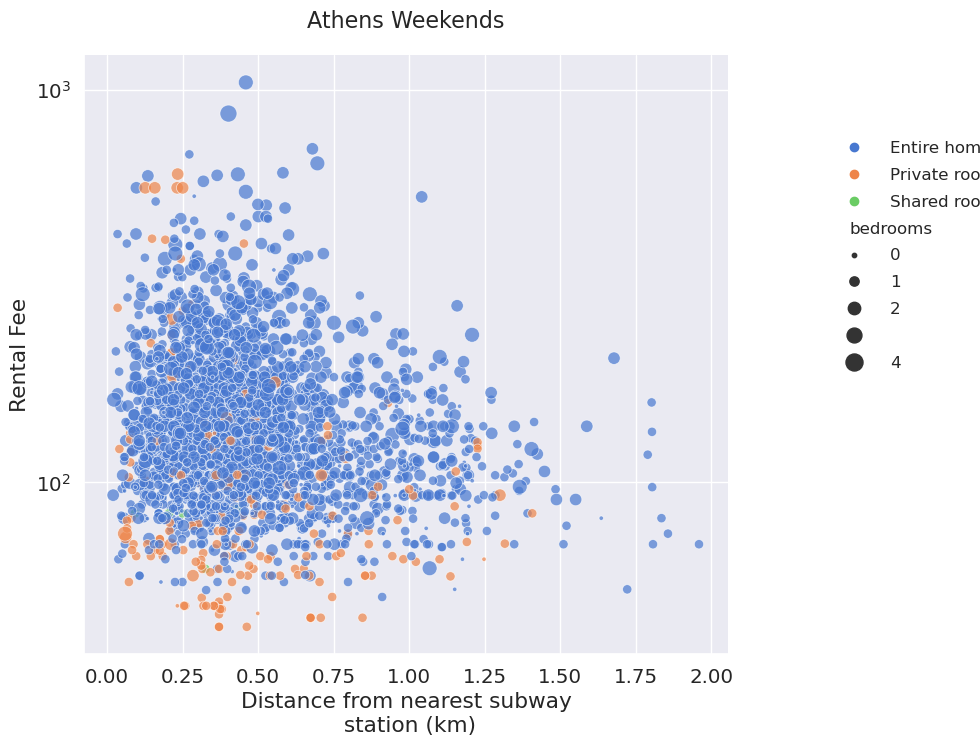

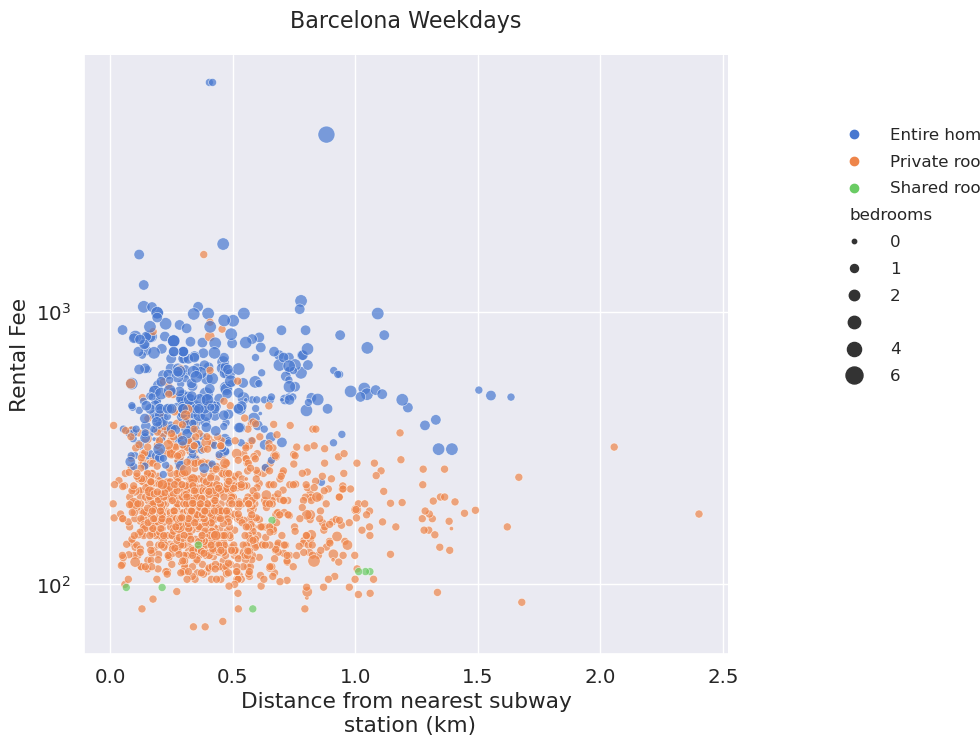

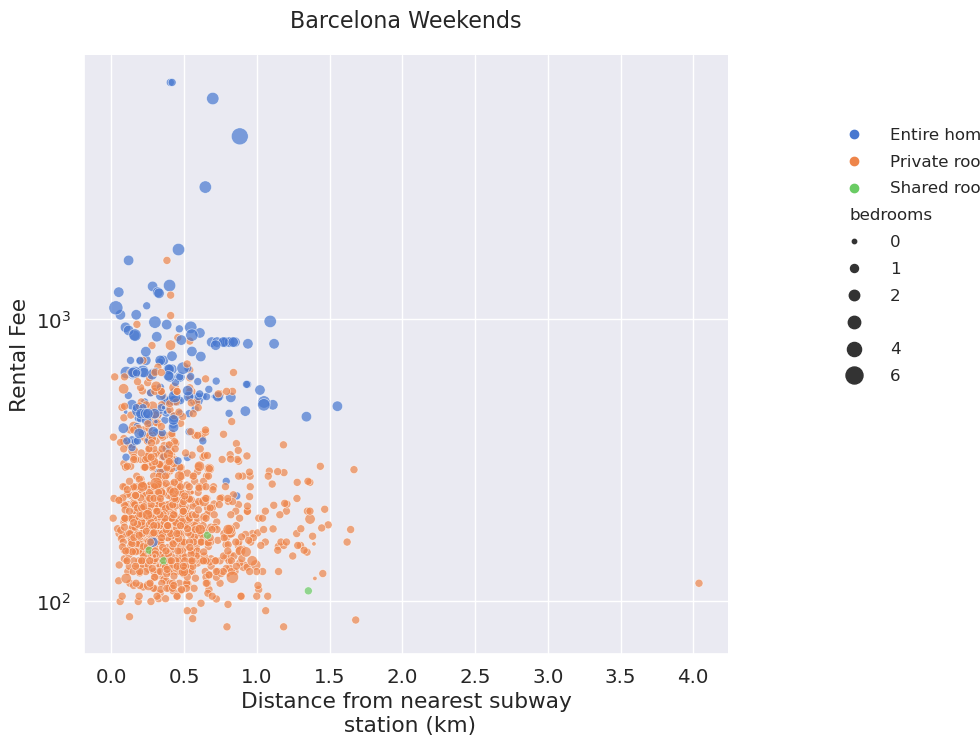

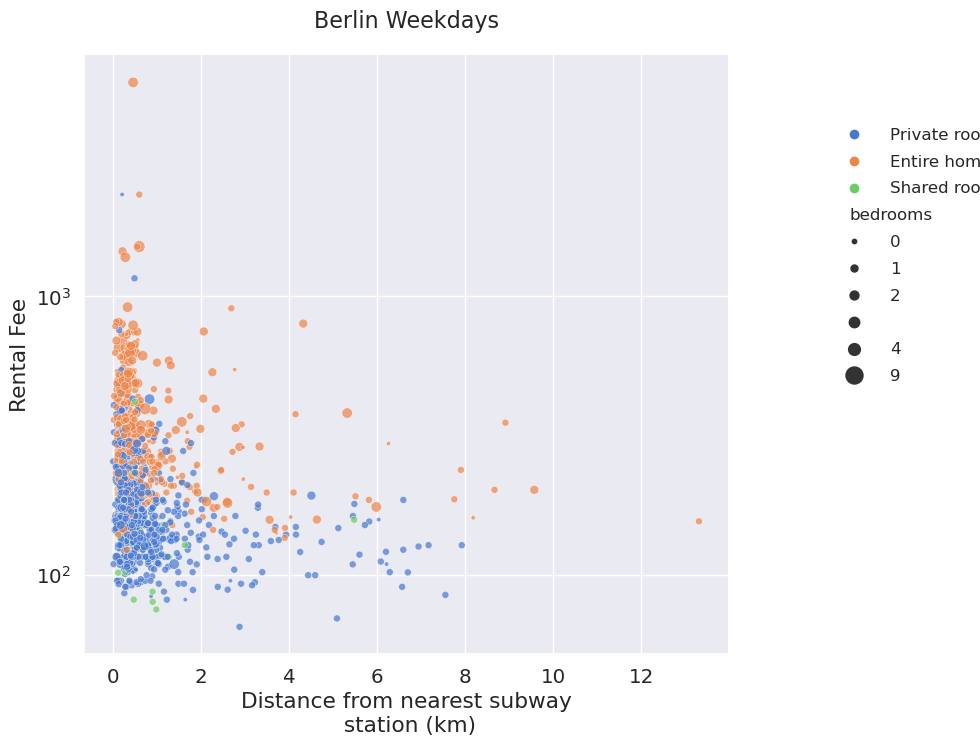

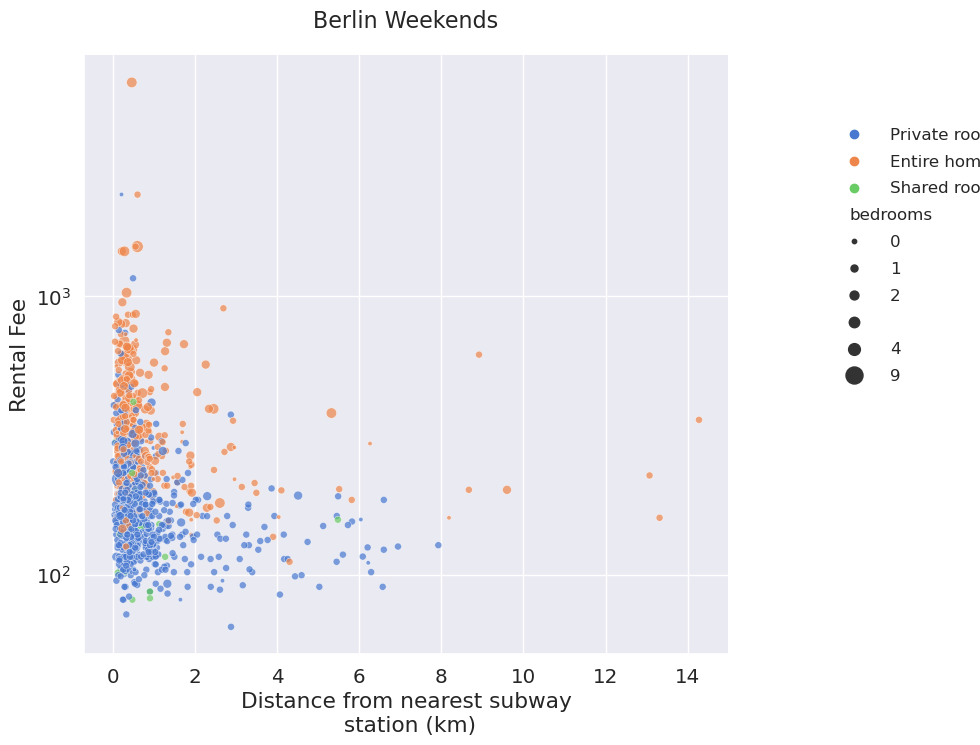

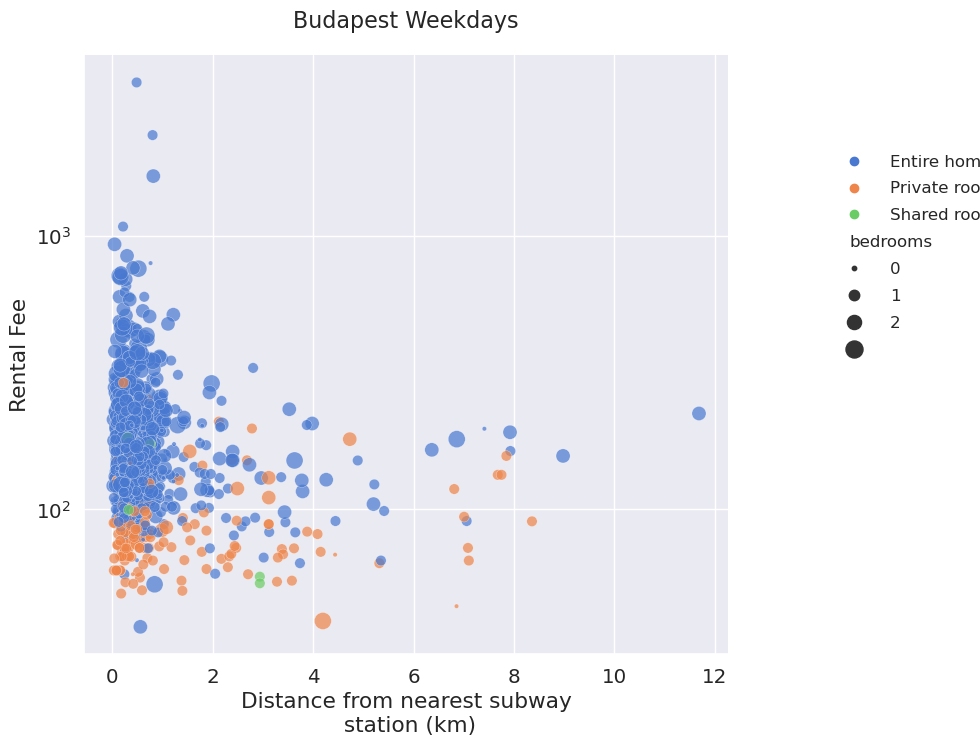

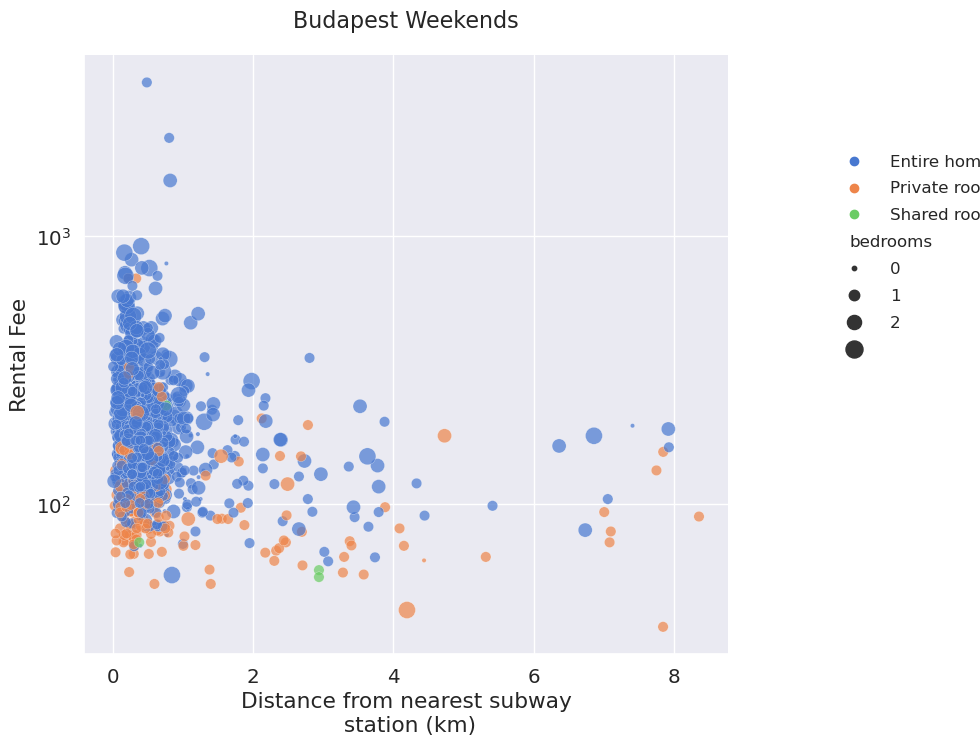

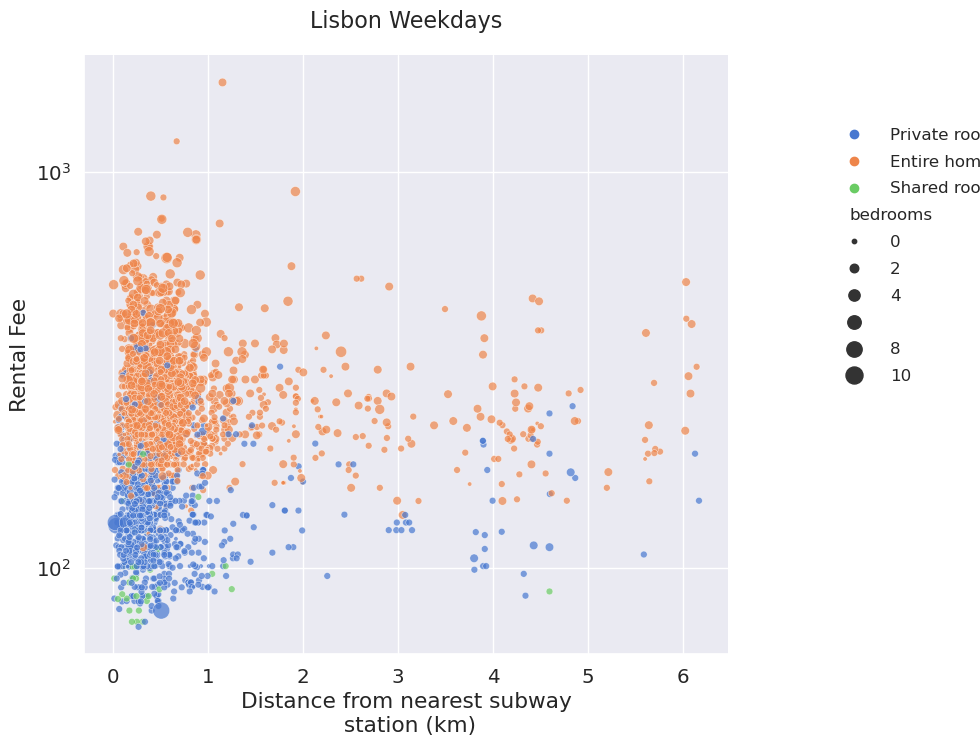

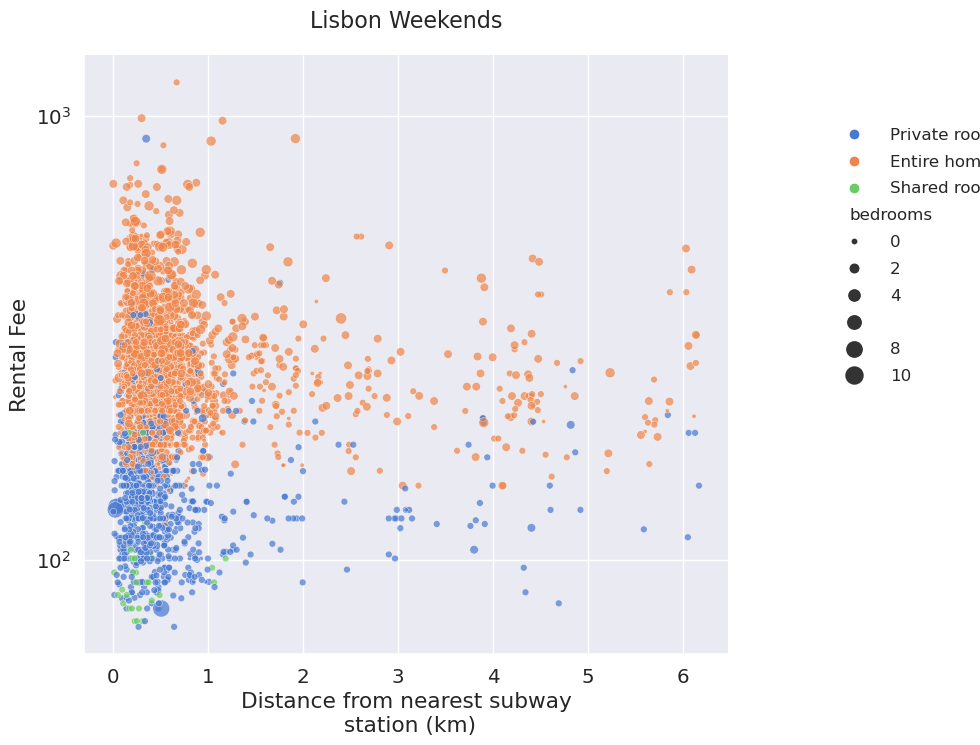

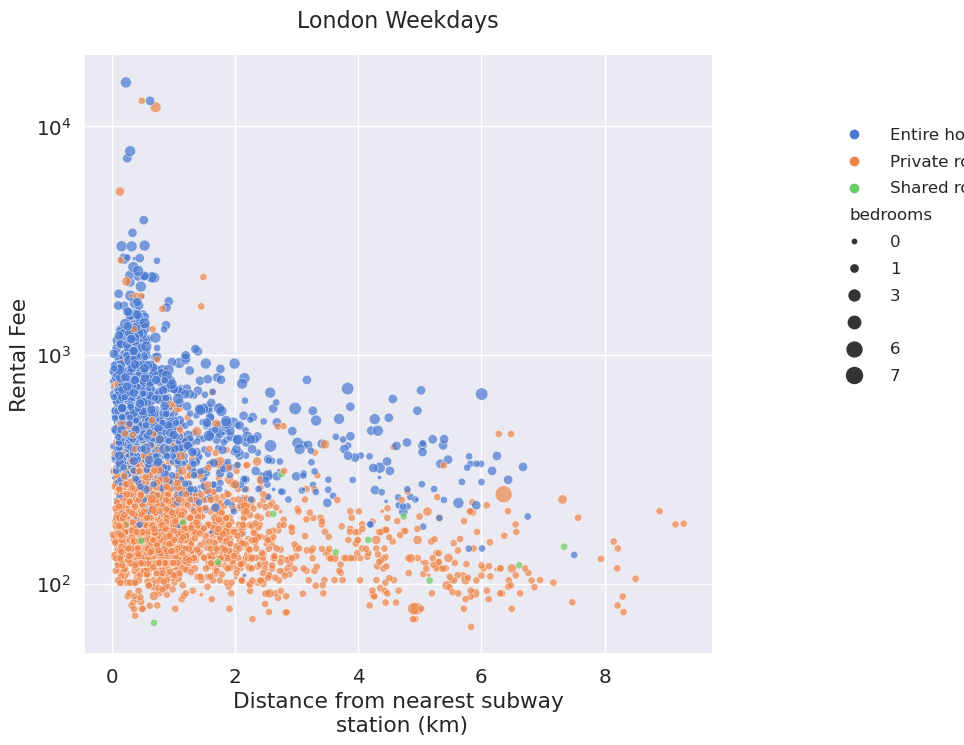

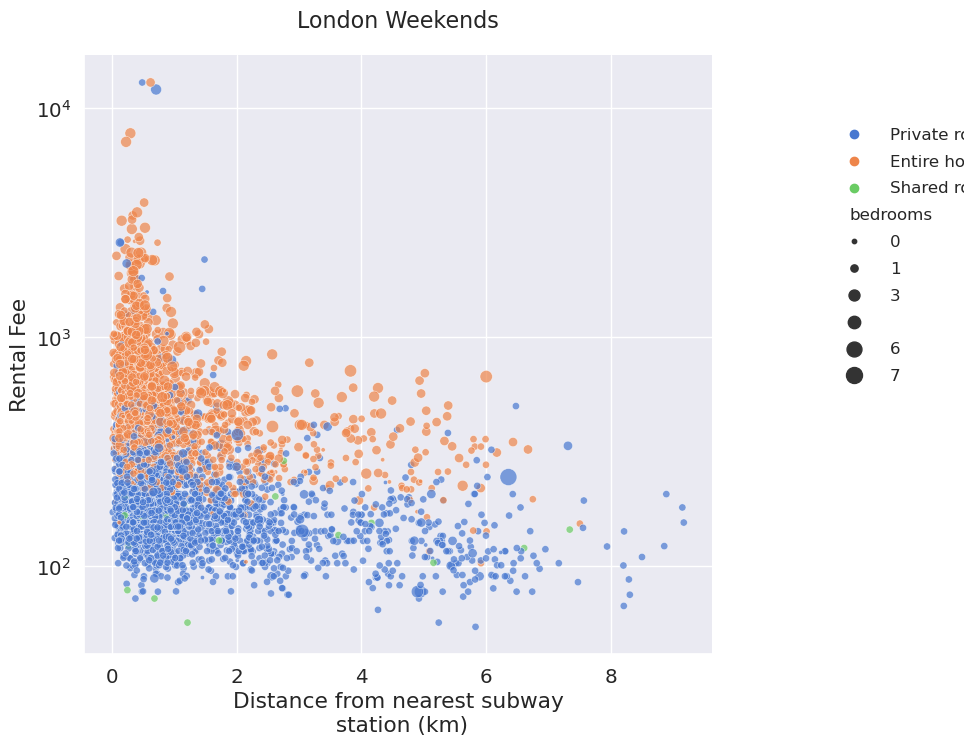

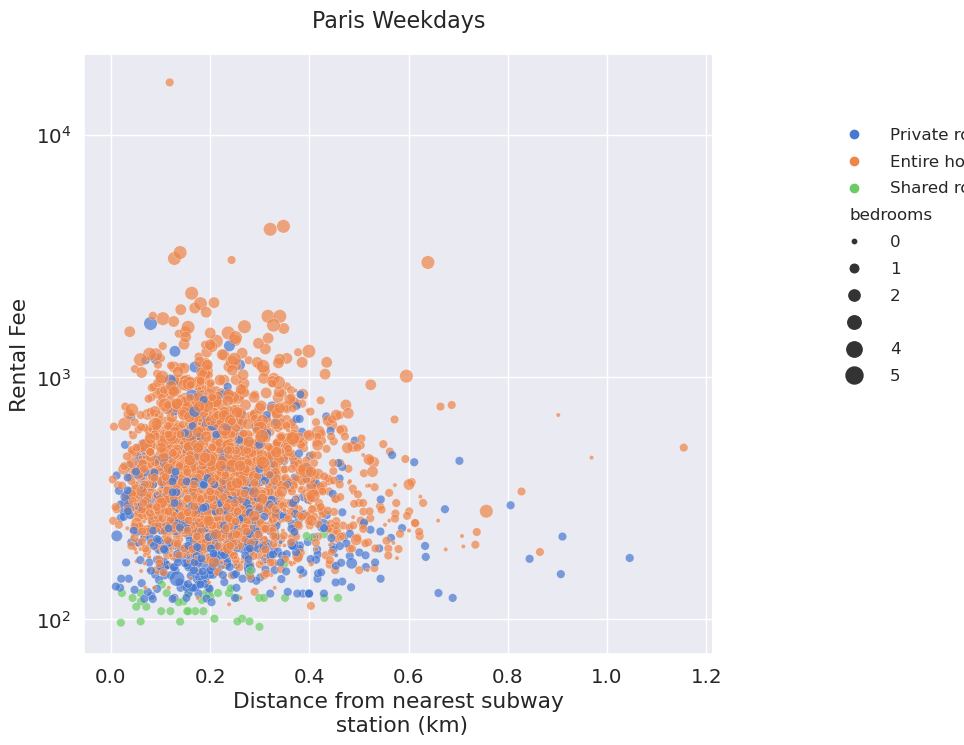

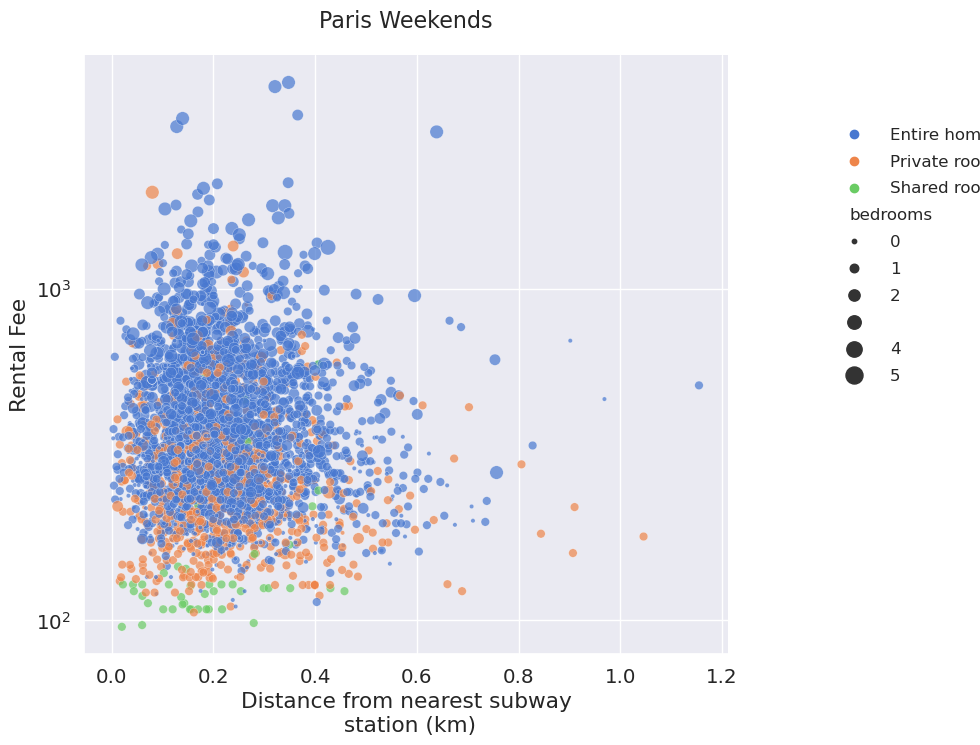

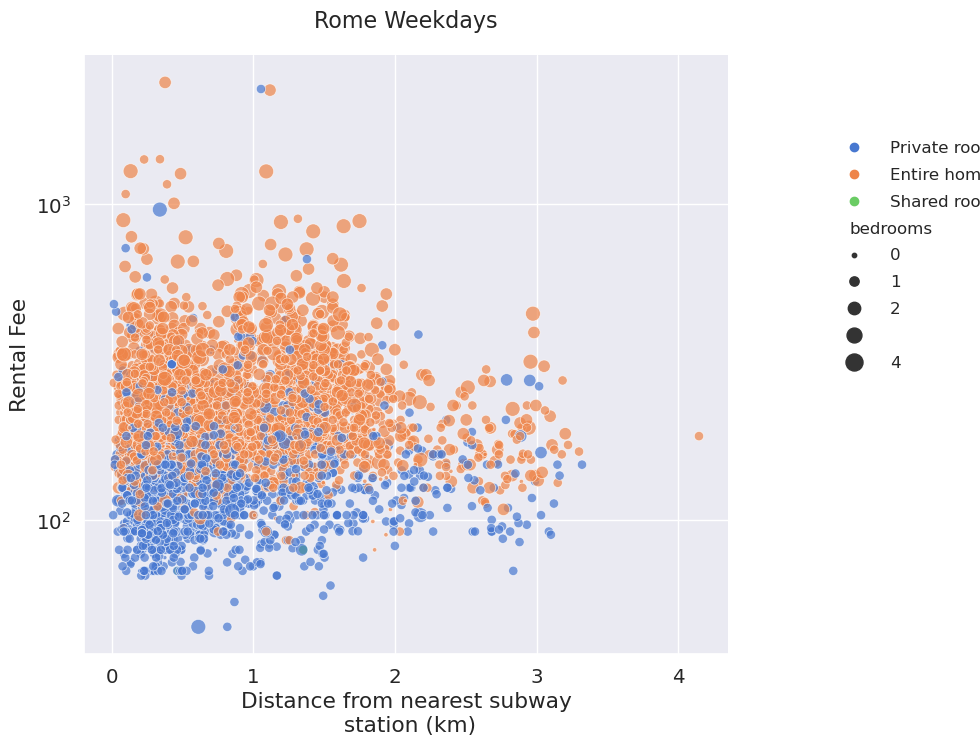

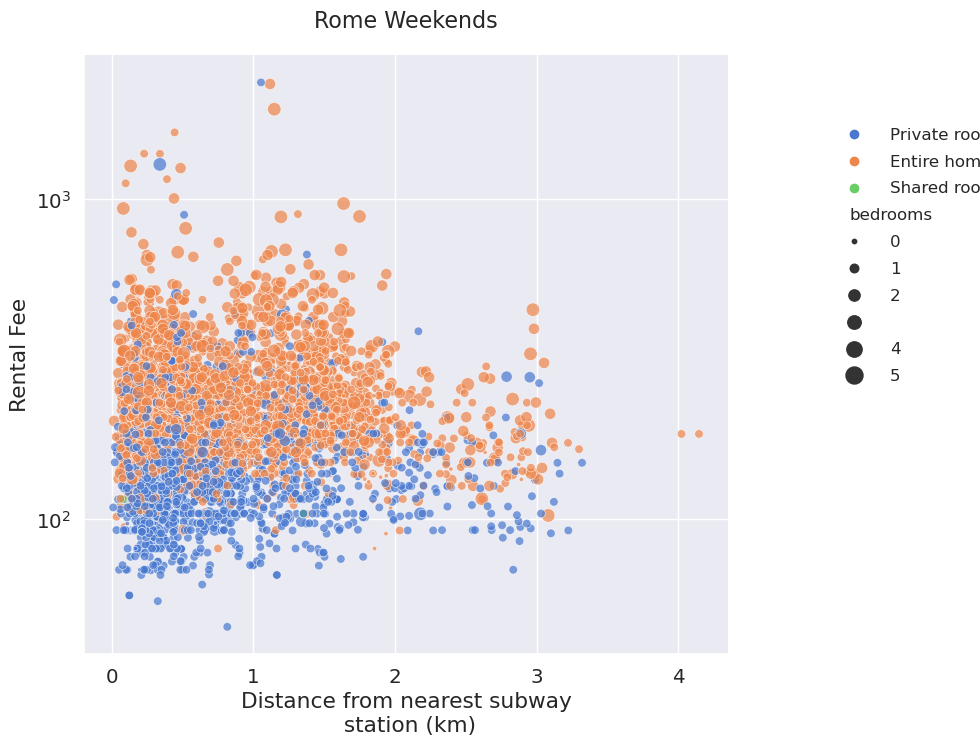

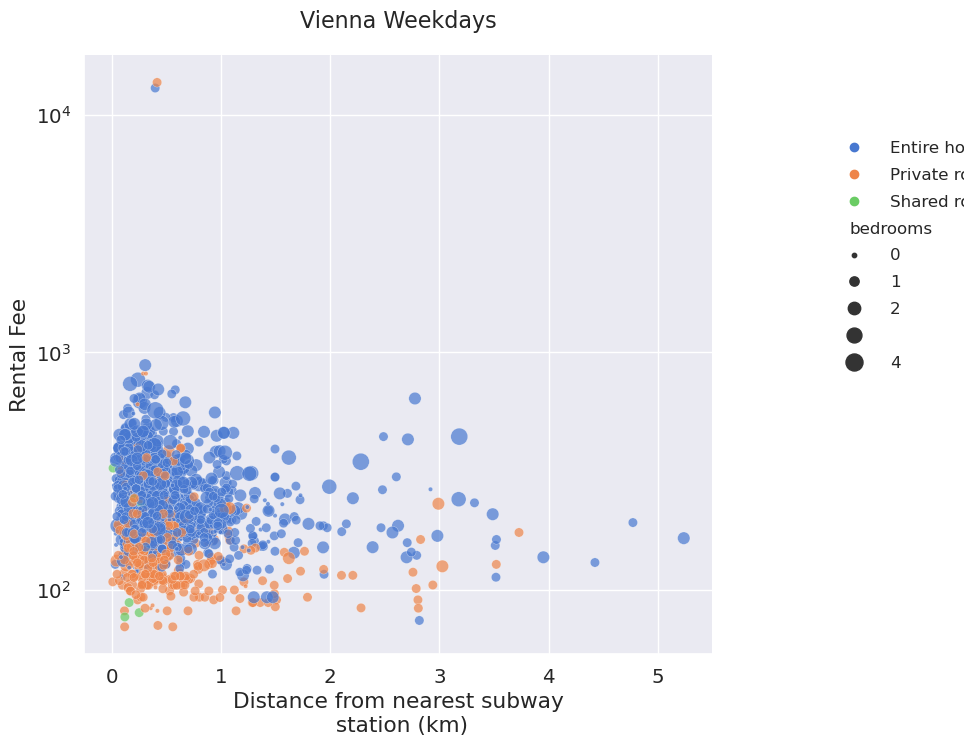

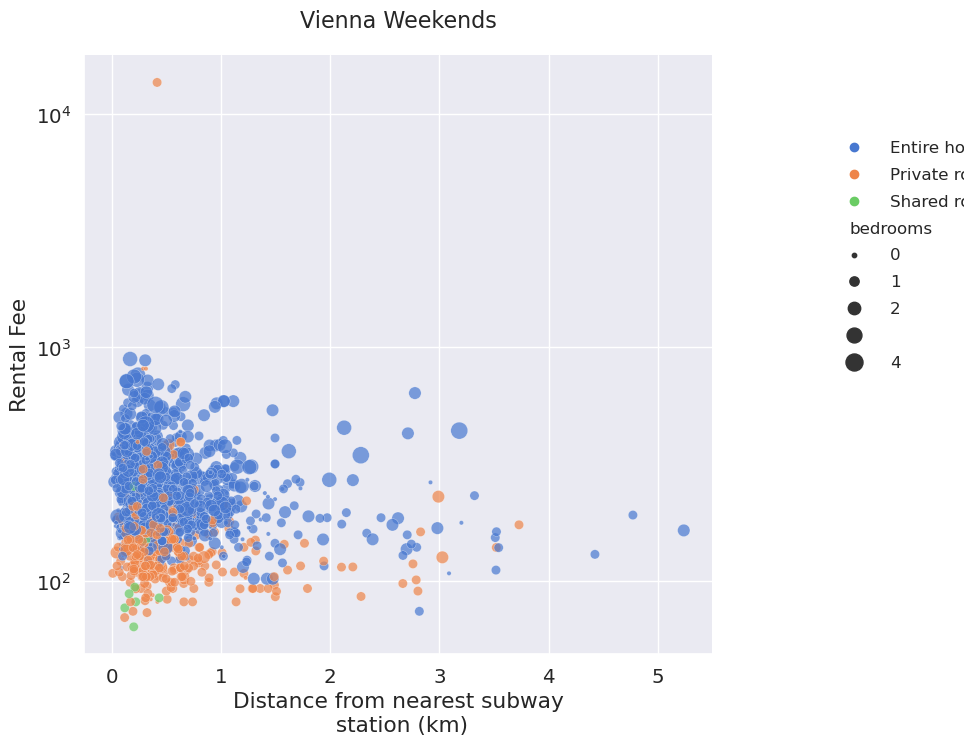

In [10]:
####### average price per city per number of bedrooms
#######
#######
filesend=['days','wend']
filestitles=['Weekdays','Weekends']
for city in Citiesnames:
    #print(city.capitalize())
    for i in range(2):
        pdcity=globals()[f"pd{city.capitalize()}_{filesend[i]}"]
        globals()[f"axess_{i}"] = sns.relplot(x='metro_dist', 
            y='realSum', 
            hue='room_type', 
            size='bedrooms',
            data=pdcity,
            sizes=(10, 150), 
            alpha=.7, 
            palette='muted', 
            height=8, 
            aspect=8/8)
        #######
        #sns.color_palette("dark")
        sns.set(font_scale = 1.3)
        globals()[f"axess_{i}"].set(xlabel='Distance from nearest subway\n station (km)',
           ylabel='Rental Fee',
           title=city.capitalize())
        plt.title(city.capitalize()+' '+filestitles[i], fontsize=16, pad=20)
        plt.subplots_adjust(top=0.85)
        plt.yscale('log')
        ######
        globals()[f"axess_{i}"]._legend.texts[0].set_text('')
        globals()[f"axess_{i}"]._legend.texts[8].set_text('')
        globals()[f"axess_{i}"]._legend.set_bbox_to_anchor([1.01, .63])
        plt.setp(globals()[f"axess_{i}"]._legend.get_texts(), fontsize='12')

    

In [11]:
############ predict Rental Fees for each particular city (weekdays), according to a list of features
##### using Matplotlib without regression
def CityAirBNBcost_predictandplot(city,features_list,axf):
    pdcity=globals()[f"pd{city.capitalize()}_{filesend[0]}"]
    features=pdcity[features_list]
    X=features.values
    y=pdcity.realSum
    #print(len(X),len(y))
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
    Lregress = LReg()
    model = Lregress.fit(X_train, y_train)
    y_predict = Lregress.predict(X_test)
    train_score = Lregress.score(X_train, y_train)
    test_score = Lregress.score(X_test, y_test)
    print('In ',city.capitalize(),' Train Score: ',train_score,'Test Score: ',test_score)
    axf.scatter(y_test, y_predict, color='#FC814A', alpha=.2)
    axf.set_xscale("log")
    axf.set_yscale("log")
    axf.axis([10,max(y),10,max(y)])
    if city in ('rome','vienna'):
        axf.set_xlabel('Predicted Airbnb prices')
    axf.set_ylabel('Actual Airbnb prices')
    axf.set_title(city.capitalize())
    

In  Amsterdam  Train Score:  0.45807801184106833 Test Score:  0.25713694211618254
In  Athens  Train Score:  0.010778604317601137 Test Score:  0.2598024959003573
In  Barcelona  Train Score:  0.1910819166773774 Test Score:  0.32910845315009374
In  Berlin  Train Score:  0.14269283211923056 Test Score:  0.13730746717288211
In  Budapest  Train Score:  0.09944492275289629 Test Score:  0.03021467984885151
In  Lisbon  Train Score:  0.38447639649511967 Test Score:  0.3143354353079044
In  London  Train Score:  0.1708675795560768 Test Score:  0.09524093381131071
In  Paris  Train Score:  0.12089305220637081 Test Score:  0.24829559880398588
In  Rome  Train Score:  0.215491555655005 Test Score:  0.3187750746434683
In  Vienna  Train Score:  0.013829583566039916 Test Score:  0.11371247911975346


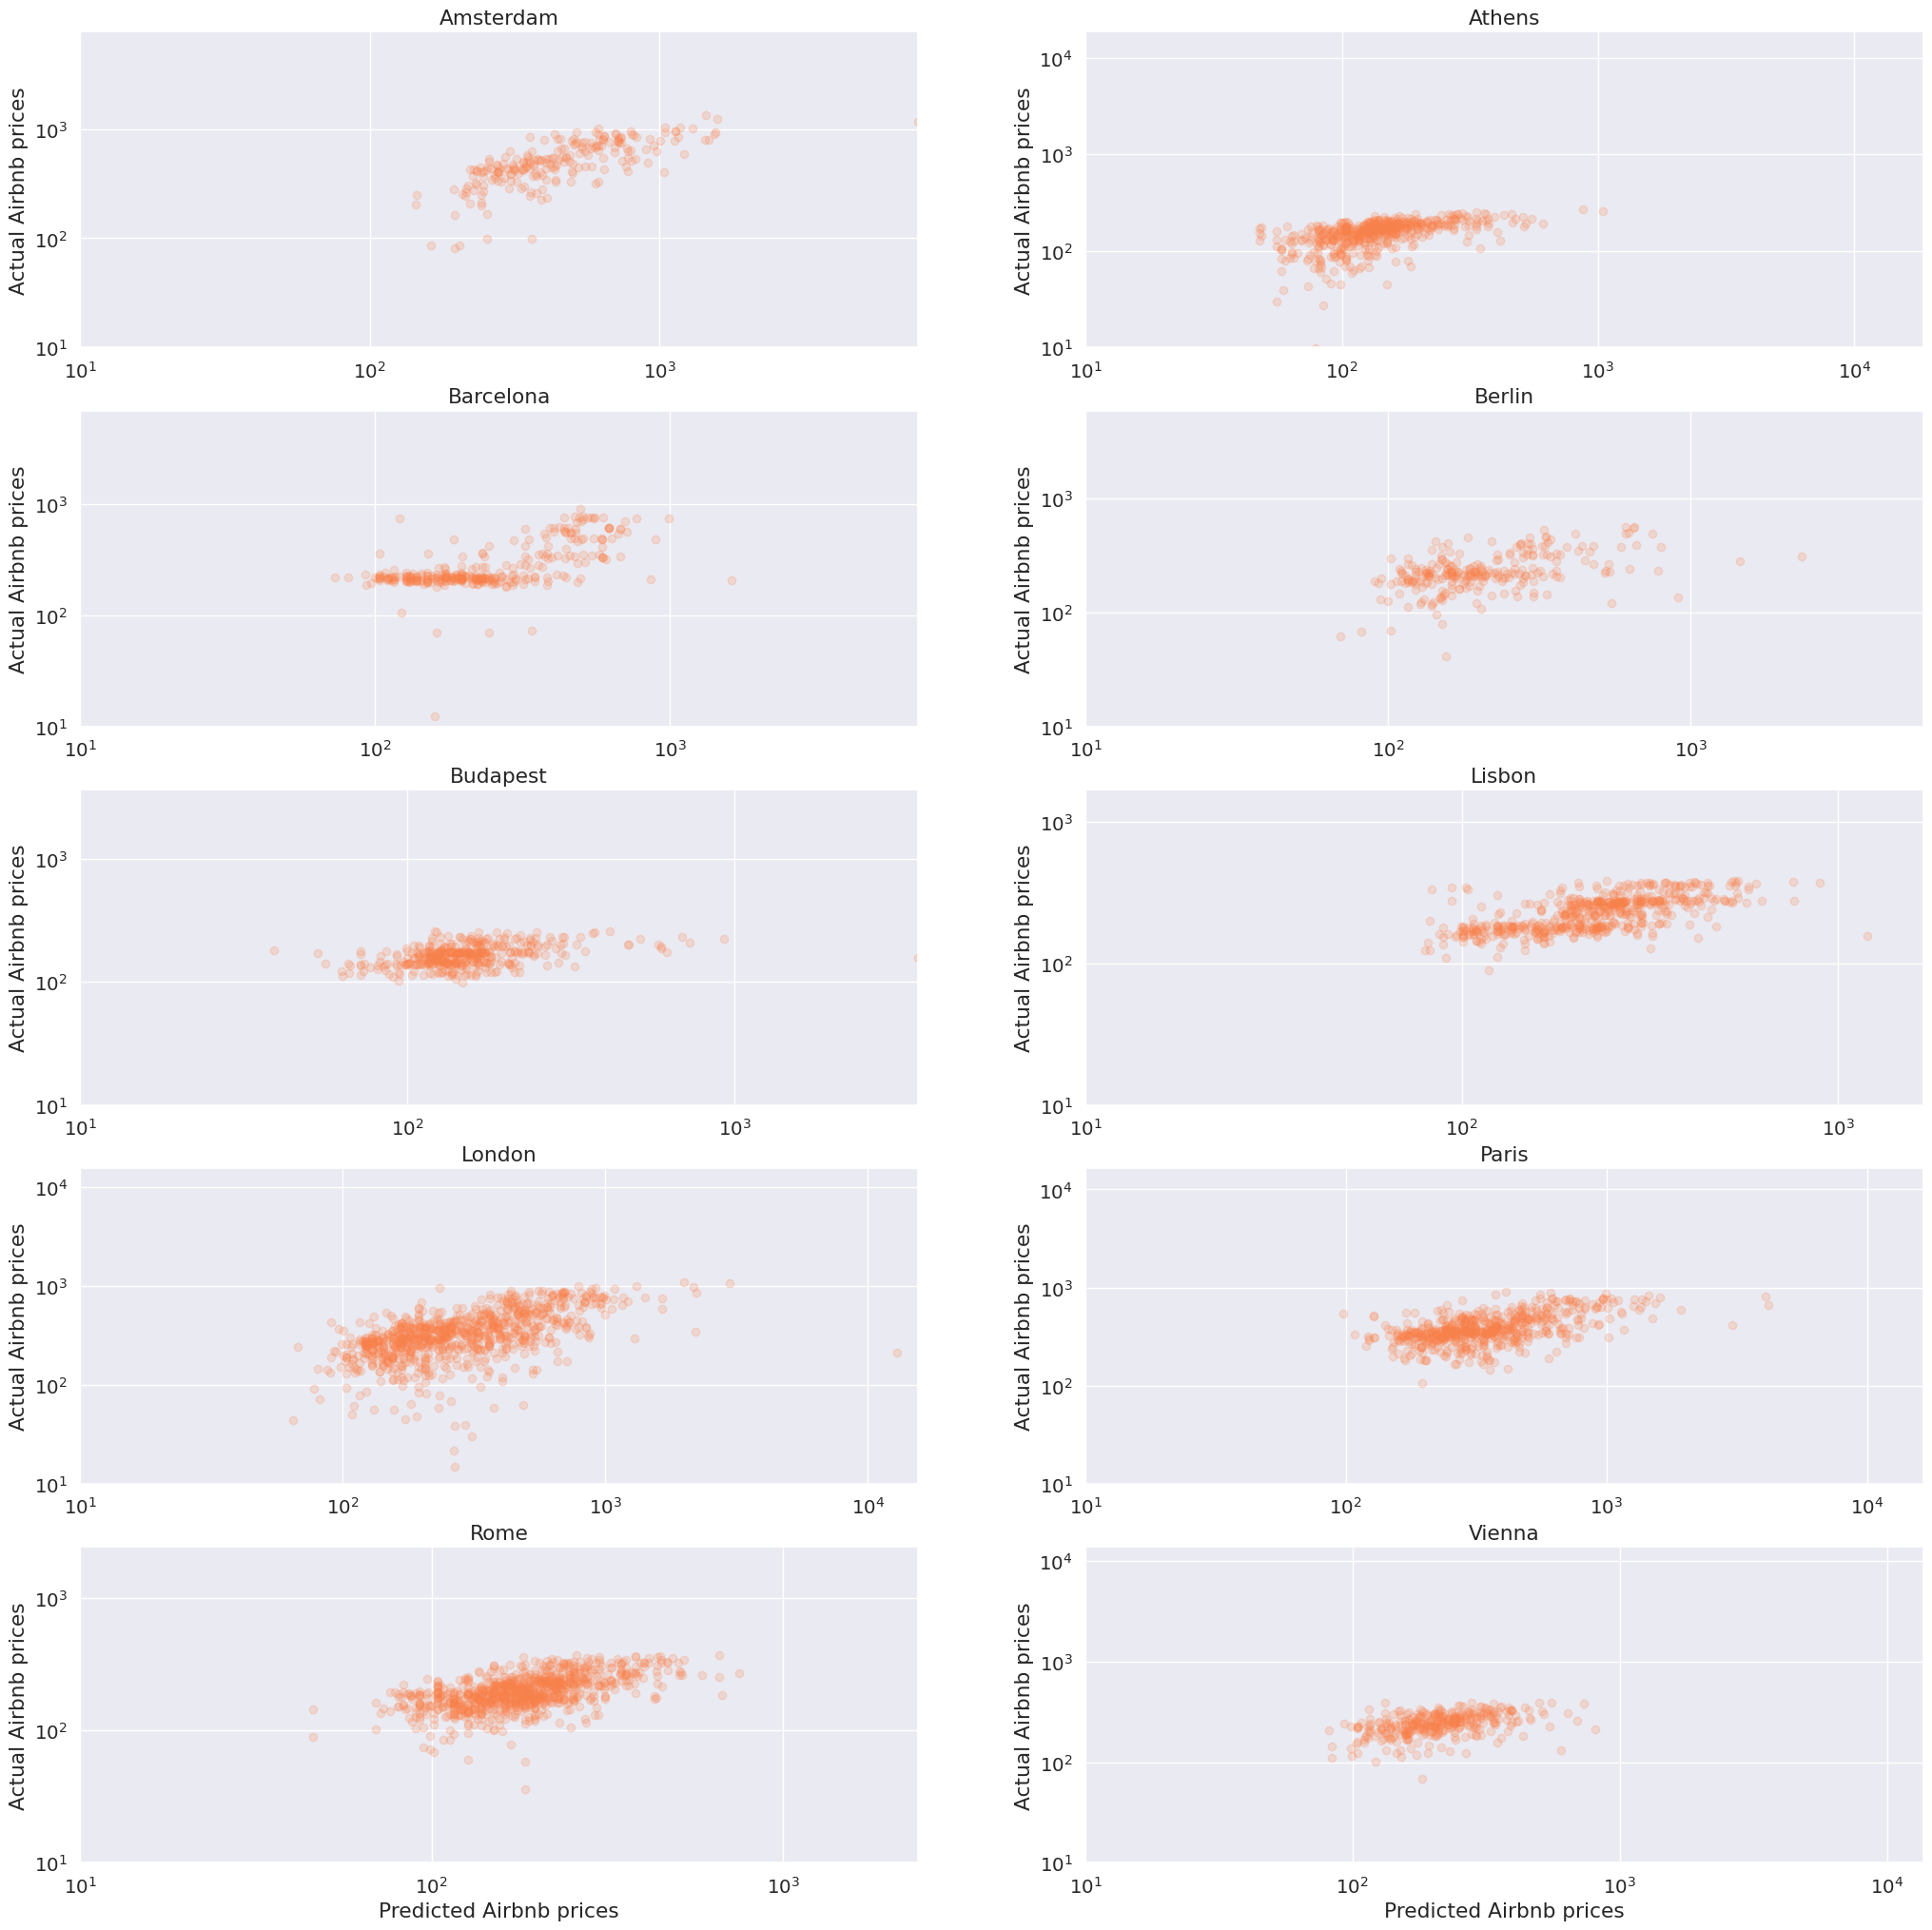

In [12]:
fig, axs = plt.subplots(5, 2,figsize=(25, 25))
i=0
features_list=['metro_dist','dist','guest_satisfaction_overall','bedrooms','person_capacity','cleanliness_rating']
placement=[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1)]
for city in Citiesnames:
    #city='athens'
    CityAirBNBcost_predictandplot(city,features_list,axs[placement[i]])
    i+=1

In  Amsterdam  Train Score:  0.3688353169891875 Test Score:  0.48620454257927337
In  Athens  Train Score:  0.011355463581336989 Test Score:  0.30821678490410254
In  Barcelona  Train Score:  0.16755862376501796 Test Score:  0.3230564896459176
In  Berlin  Train Score:  0.1654664791577669 Test Score:  -0.034011908940272395
In  Budapest  Train Score:  0.05665269112297355 Test Score:  0.15413680774797356
In  Lisbon  Train Score:  0.3644785059309996 Test Score:  0.38386812169986684
In  London  Train Score:  0.15797539522887383 Test Score:  0.15194429951555743
In  Paris  Train Score:  0.30263015552989536 Test Score:  0.0360764576530852
In  Rome  Train Score:  0.21745451034006325 Test Score:  0.2882643707201229
In  Vienna  Train Score:  0.013794555199669767 Test Score:  0.12885748142418096


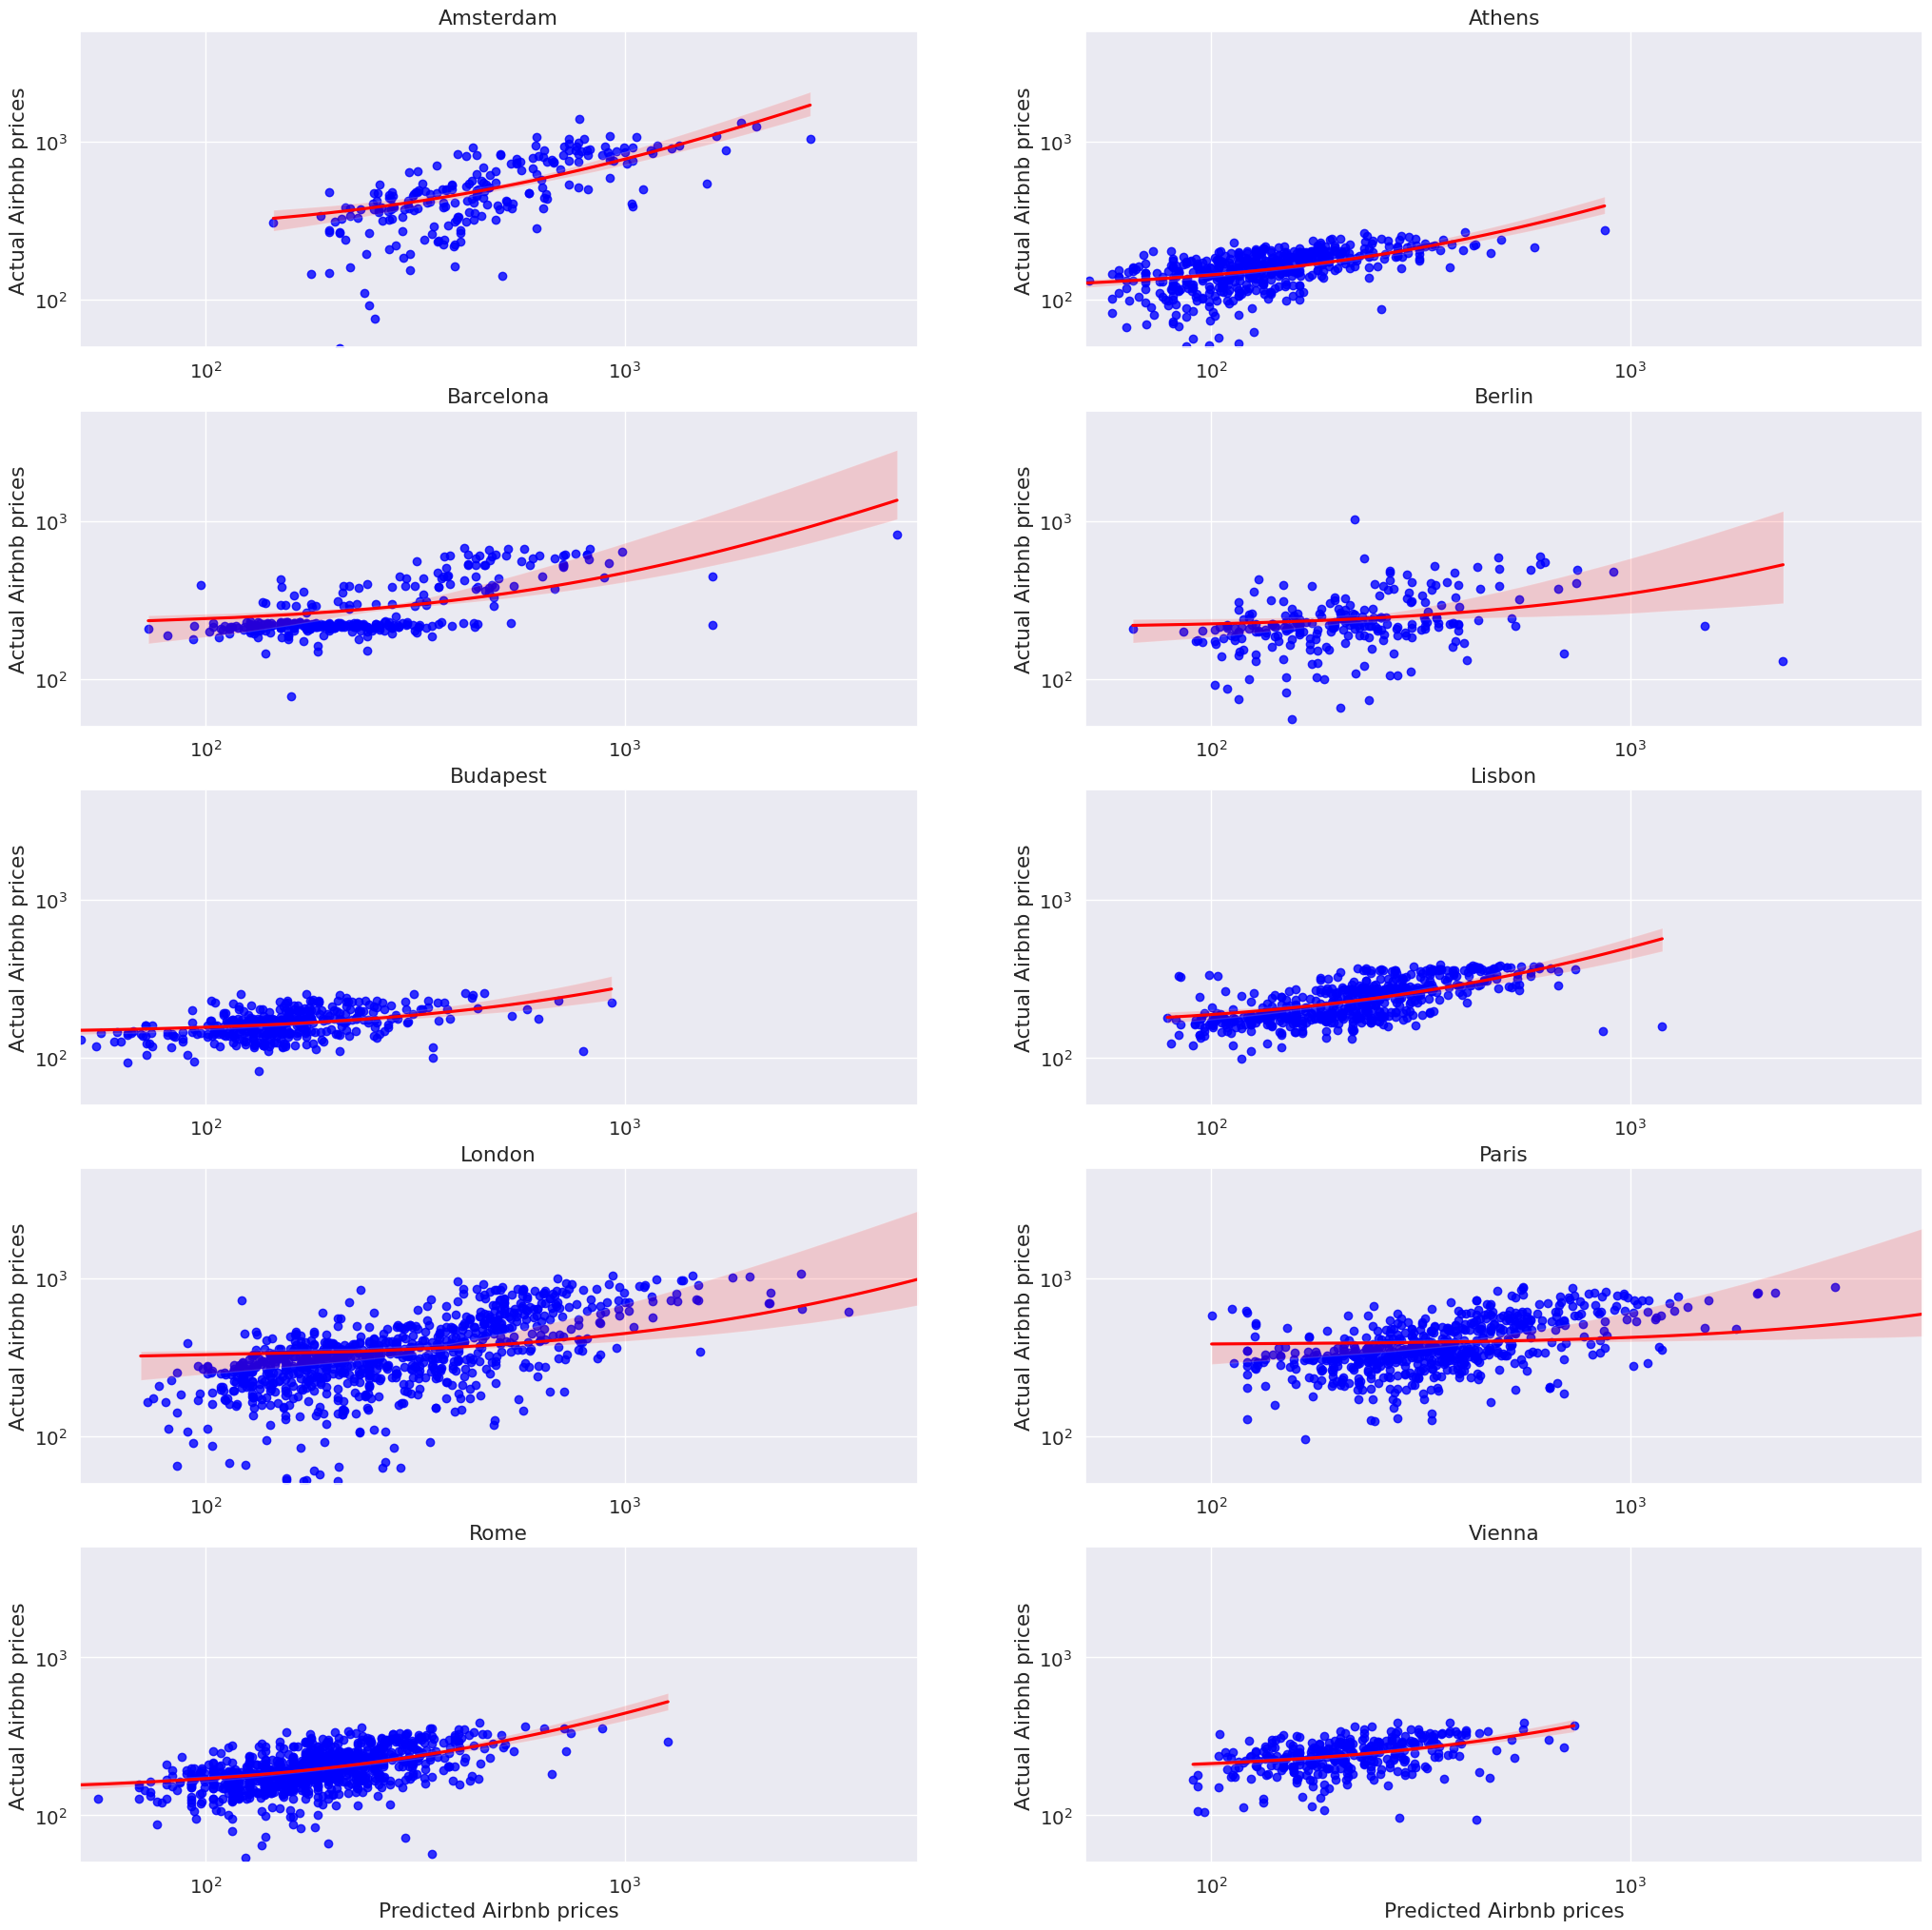

In [13]:
############ predict Rental Fees for each particular city (weekdays), according to a list of features
##### using Seaborn with regression
def CityAirBNBcost_predict(city,features_list):
    pdcity=globals()[f"pd{city.capitalize()}_{filesend[0]}"]
    features=pdcity[features_list]
    X=features.values
    y=pdcity.realSum
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
    Lregress = LReg()
    model = Lregress.fit(X_train, y_train)
    y_predict = Lregress.predict(X_test)
    train_score = Lregress.score(X_train, y_train)
    test_score = Lregress.score(X_test, y_test)
    ######## estimate each feature's weight for the particular city
    feat_weights = Lregress.coef_
    print('In ',city.capitalize(),' Train Score: ',train_score,'Test Score: ',test_score)
    return y_test, y_predict,feat_weights

figk, axs = plt.subplots(5, 2,figsize=(25, 25))
i=0
placement=[(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0),(4,1)]
features_list=['metro_dist','dist','guest_satisfaction_overall','bedrooms','person_capacity','cleanliness_rating']
all_cities_featcoeffs=[]
for city in Citiesnames:
    axf=axs[placement[i]]
    y_test, y_predict,feat_weights=CityAirBNBcost_predict(city,features_list)
    all_cities_featcoeffs.append(feat_weights)
    citytetdata=np.squeeze(np.transpose([[y_test],[y_predict]]))
    datapredicts=pd.DataFrame(citytetdata, columns=['ypred','ytrue'])
    sns.regplot(ax=axf,x='ypred',y='ytrue',data=datapredicts,\
                scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    axf.set_xscale("log")
    axf.set_yscale("log")
    axf.set_title(city.capitalize())
    axf.set_ylabel('Actual Airbnb prices')
    i+=1
    axf.axis([50,5*10**3,50,5*10**3])
    if city in ('rome','vienna'):
        axf.set(xlabel='Predicted Airbnb prices',\
                ylabel='Actual Airbnb prices')
    else:
        axf.set(xlabel=' ')
    

In [14]:
######### store the features weights for the rental fee for each particular city in a new dataframe
features_list_new=['Dist. from Metro','Dist. from Center','Rating',\
                  '#Bedrooms','Person Capacity','Cleanliness']
                   
AllcfeatcoffT=np.round(np.transpose(all_cities_featcoeffs),2)
weighting_data2={features_list_new[i]:AllcfeatcoffT[i] \
                for i in range(len(features_list))}
weighting_data1={'City':Cities_inds}
###### unpack and pack to put cities as indices
weighting_data = {**weighting_data1, **weighting_data2}
WeightsDf=pd.DataFrame(weighting_data)

In [15]:
print('Features'' weights per City:\n')
WeightsDf

Features weights per City:



City  Dist. from Metro  Dist. from Center  Rating  #Bedrooms  \
0  Amsterdam            -25.45             -44.47    6.17     157.97   
1     Athens            -46.66             -34.24    0.86      30.43   
2  Barcelona            -33.77              -1.55   -0.28      59.38   
3     Berlin             -4.52              -7.08   -1.04     100.19   
4   Budapest             -4.97              -1.85   -0.38      24.09   
5     Lisbon              4.35              -9.05    0.11      13.26   
6     London             -9.95             -29.86    0.93     138.59   
7      Paris             50.89             -21.39   -0.87     100.46   
8       Rome             18.66             -15.62    0.86      34.64   
9     Vienna             10.50             -22.50    2.57      26.02   

   Person Capacity  Cleanliness  
0           133.07        -9.65  
1             1.85         8.34  
2            82.48         8.31  
3            44.35        28.10  
4            14.77         6.12  
5            39.68        11.42  
6            87.51         4.81  
7            81.33        30.62  
8            28.53        -0.97  
9            22.33       -33.93